In [4]:
from math import sqrt, exp, pi
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

!jt -t ondork

Didn't recognize theme name: ondork
Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


## Урок 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

### 1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800].
### Найдите ее среднее значение и дисперсию.

$$ \begin{cases}
0,\ x\leqslant a\\
\frac{x-a}{b-a} ,\ a< x\leqslant b\\
1,\ x >b
\end{cases} $$ 

### Решение:

$ M( X) =\frac{a+b}{2}, D( X) =\frac{( a-b)^{2}}{12} $

In [12]:
a = 200
b = 800

M_X = (a + b) / 2
D_X = (a - b) ** 2 / 12

print(f'''
Среднее значение (математическое ожидание) M(X) = {M_X}
Дисперсия составляет: D(X) = {D_X}
''')


Среднее значение (математическое ожидание) M(X) = 500.0
Дисперсия составляет: D(X) = 30000.0



### 2. О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2.
### Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

### Решение:

$ b=a-\sqrt{12\cdot{D(X)}} $

In [3]:
a = 0.5
D_X = 0.2

b = a - sqrt(12 * D_X)
M_X = (a + b) / 2

print(f'''
Правая граница b = {b}
Среднее значение (математическое ожидание) M(X) = {M_X}
''')


Правая граница b = -1.0491933384829668
Среднее значение (математическое ожидание) M(X) = -0.2745966692414834



### 3. Непрерывная случайная величина X распределена нормально и задана плотностью распределения
### f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-(x+2)**2) / 32).
### Найдите:
### а). M(X)
### б). D(X)
### в). std(X) (среднее квадратичное отклонение)

### Решение:

1) $ f( x) =\frac{1}{4\cdot \sqrt{2\pi }} \cdot \frac{e^{-( x+2)^{2}}}{32} $

2) $ f( x) =\frac{1}{4\cdot \sqrt{2\cdot \pi }} \cdot e^{\frac{-( x+2)^{2}}{32}} $

In [4]:
M_X = -2
S_X = 4
D_X = S_X ** 2

print(f'''
а) M(X) = {M_X}
б) D(X) = {D_X}
в) std(x) = {S_X}
''')


а) M(X) = -2
б) D(X) = 16
в) std(x) = 4



### 4. Рост взрослого населения города X имеет нормальное распределение.
### Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.
### Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
### а). больше 182 см
### б). больше 190 см
### в). от 166 см до 190 см
### г). от 166 см до 182 см
### д). от 158 см до 190 см
### е). не выше 150 см или не ниже 190 см
### ё). не выше 150 см или не ниже 198 см
### ж). ниже 166 см.

### Решение:

$ Z=\frac{x-M(X)}{S(X)} $  

In [5]:
M_X = 174
S_X = 8

Z = lambda x: (x - M_X) / S_X

pdf = lambda x: 1 / (S_X * sqrt(2 * pi)) * exp(-(M_X - x) ** 2 / (2 * S_X ** 2))
cdf = lambda x: 100 * stats.norm.cdf(Z(x)) # percent

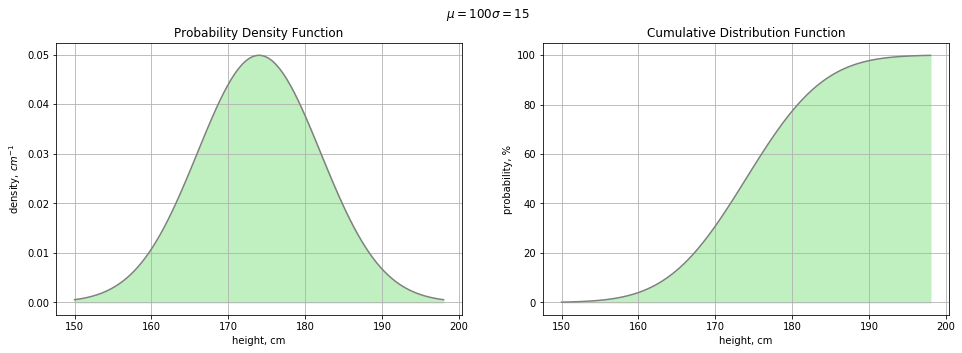

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('$\mu = 100  \sigma = 15$')
fig.set_size_inches(16,5)

x_1 = np.linspace(M_X - 3 * S_X, M_X + 3 * S_X, 100)
y_1 = [pdf(x) for x in x_1]

ax1.plot(x_1, y_1, color='gray')
ax1.grid(True)
ax1.set_title('Probability Density Function')
ax1.set_xlabel('height, cm')
ax1.set_ylabel('density, $cm^{-1}$')
ax1.fill_between(x_1, y_1, 0, color='#c0f0c0')

x_2 = np.linspace(M_X - 3 * S_X, M_X + 3 * S_X, 100)
y_2 = [cdf(x) for x in x_2]

ax2.plot(x_2, y_2, color='gray')
ax2.grid(True)
ax2.set_title('Cumulative Distribution Function')
ax2.set_xlabel('height, cm')
ax2.set_ylabel('probability, %')
ax2.fill_between(x_2, y_2, 0, color='#c0f0c0')

In [7]:
p_1 = 100 - cdf(182)
p_2 = 100 - cdf(190)
p_3 = cdf(190) - cdf(166)
p_4 = cdf(182) - cdf(166)
p_5 = cdf(190) - cdf(158)
p_6 = 100 - cdf(190) + cdf(150)
p_7 = 100 - cdf(198) + cdf(150)
p_8 = cdf(166)

print(f'''
a) {p_1:.4} % имеет рост больше 182 см
б) {p_2:.4} % имеет рост больше 190 см
в) {p_3:.4} % имеет рост от 166 до 190 см
г) {p_4:.4} % имеет рост от 166 до 182 см
д) {p_5:.4} % имеет рост от 158 до 190 см
у) {p_6:.4} % имеет рост не выше 150 или не ниже 190 см
ё) {p_7:.4} % имеет рост не выше 150 или не ниже 198 см
ж) {p_8:.4} % имеет рост ниже 166 см
''')


a) 15.87 % имеет рост больше 182 см
б) 2.275 % имеет рост больше 190 см
в) 81.86 % имеет рост от 166 до 190 см
г) 68.27 % имеет рост от 166 до 182 см
д) 95.45 % имеет рост от 158 до 190 см
у) 2.41 % имеет рост не выше 150 или не ниже 190 см
ё) 0.27 % имеет рост не выше 150 или не ниже 198 см
ж) 15.87 % имеет рост ниже 166 см



### 5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

### Решение:

In [8]:
height = 190
M_X = 178
D_X = 25

S_X = sqrt(25)

Z = (height - M_X) / S_X

print(f'Рост человека в 190 см отклоняется от среднего роста популяции на {Z}\N{greek small letter sigma}')

Рост человека в 190 см отклоняется от среднего роста популяции на 2.4σ
